# Calculating properties of loops

This notebook demonstrates the different ways of calculating properties of loops in numpy
The script `generate_fake_loop.py` was used to generate a loop with artificial noise and missingness from parametric equation: 

$$
\begin{align}
x & = \cos(\theta) + \sin(\theta)\\
y & = \sin(\theta)
\end{align}
$$

where $\theta$ is in the range $[0, 2\pi]$

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

Importing data:

In [3]:
DATA = 'data/loop_data.csv'
data = np.genfromtxt(DATA, delimiter=',')
x = data[:, 0]
y = data[:, 1]

In [4]:
data.shape

(1001, 2)

## Plotting the data

Lets see how the data compares to a smooth parametric plot

Text(0, 0.5, 'y')

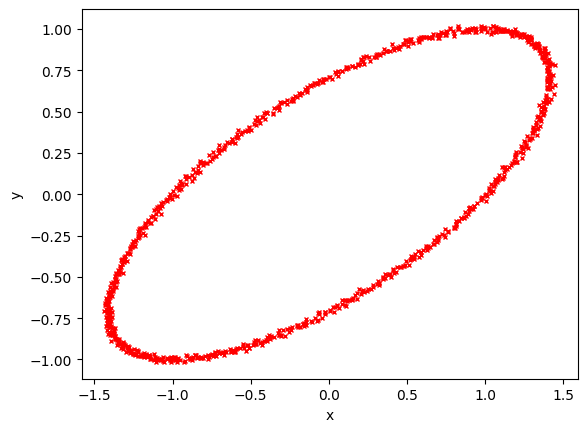

In [5]:
plt.plot(x, y, 'rx', markersize = 3)
plt.xlabel('x')
plt.ylabel('y')

### Missingness handling

What if we get rid of the missing data?

Its important that when we drop missing data, we drop it from both `x` and `y`
This is because things can get 'out of sync' otherwise 
- In other words, if we drop $x_i$, we also want to drop $y_i$
- Below is an example of what **not** to do

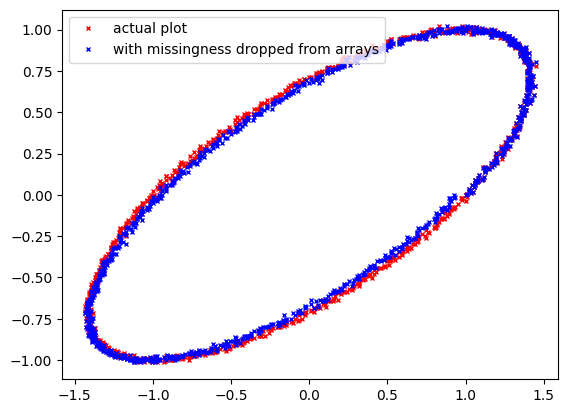

In [6]:
xfiltered = x[~np.isnan(x)][:980]
yfiltered = y[~np.isnan(y)][:980]
plt.plot(x, y, 'rx', markersize=3,
         label='actual plot')
plt.plot(xfiltered,yfiltered, 'bx', markersize=3, label = 'with missingness dropped from arrays')
plt.legend()
plt.show()

Instead, we can filter like this:

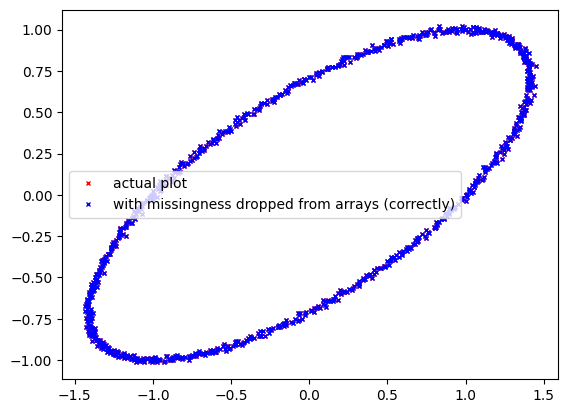

In [7]:
# For structured arrays, build the mask field-by-field
mask = (~np.isnan(data[:,0])) & (~np.isnan(data[:,1]))
filtered_data = data[mask]
plt.plot(x, y, 'rx', markersize=3,
         label='actual plot')
plt.plot(filtered_data[:, 0], filtered_data[:, 1], 'bx', markersize=3,
         label='with missingness dropped from arrays (correctly)')
plt.legend()
plt.show()

### Area calculation

What is the actual, expected area enclosed in the curve?


$$
\begin{align}
x & = \cos(\theta) + \sin(\theta)\\
y & = \sin(\theta)
\end{align}
$$

Any area is just 

$$
A = \int x(\theta) y'(\theta) d\theta
$$

So $A = \pi$ is the true area.

How can we estimate this?

In [8]:
trapezoid_method_estimate = np.trapezoid(filtered_data[:, 1], filtered_data[:, 0])
trapezoid_method_estimate

np.float64(-3.1403015170585)

Why is the above negative? 
- Closed Loops: the area always depends on the traversal direction - counterclockwise traversal means that the loops have a positive area (this is because, for increasing `dy`, you have a positive contribution of `xdy` )
- `np.trapezoid` integrates in the direction that the data goes in. For example, if we supply `filtered_data` where following indeces 0 -> 100 is going clockwise, then we are integrating in the clockwise direction and will get a negative are. 
- How can we get around this?
    - Quick fix: take `abs(trapezoid_method_estimate)` 

### Alternative: the shoelace method

TODO: write up explanation

In [11]:
y, x = filtered_data[:, 1], filtered_data[:, 0]
x_c = np.concatenate([x, x[:1]])
y_c = np.concatenate([y, y[:1]])
area = 0.5 * np.sum(x_c[:-1]*y_c[1:] - x_c[1:]*y_c[:-1])
area

np.float64(3.1402947024585)

## Maximum and minimum gradient 